In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


num_transactions = 50_000
num_customers = 5_000
num_products = 200


customers = pd.DataFrame({
    'customer_id': range(1, num_customers + 1),
    'age': np.random.randint(18, 70, num_customers),
    'gender': np.random.choice(['Male', 'Female'], num_customers, p=[0.45, 0.55]),
    'city': np.random.choice(['Warszawa', 'Kraków', 'Wrocław', 'Poznań', 'Gdańsk'], num_customers, p=[0.3, 0.2, 0.2, 0.15, 0.15])
})


categories = ['Napoje', 'Przekąski', 'Alkohol', 'Produkty świeże', 'Nabiał', 'Pieczywo', 'Słodycze', 'Mrożonki']
products = pd.DataFrame({
    'product_id': range(1, num_products + 1),
    'category': np.random.choice(categories, num_products),
    'product_name': [f'Produkt_{i}' for i in range(1, num_products + 1)],
    'price': np.round(np.random.uniform(1.5, 30, num_products), 2)
})


transactions = pd.DataFrame({
    'transaction_id': range(1, num_transactions + 1),
    'customer_id': np.random.choice(customers['customer_id'], num_transactions),
    'product_id': np.random.choice(products['product_id'], num_transactions),
    'quantity': np.random.randint(1, 5, num_transactions),
    'purchase_date': pd.to_datetime(np.random.choice(pd.date_range('2024-01-01', '2024-12-31'), num_transactions))
})


merged_df = transactions.merge(customers, on='customer_id').merge(products, on='product_id')


In [3]:
transactions['month'] = transactions['purchase_date'].dt.month
transactions_per_month = transactions.groupby('month')['transaction_id'].count().sort_index()
transactions_per_month


month
1     4212
2     4013
3     4049
4     4195
5     4226
6     4063
7     4310
8     4208
9     4044
10    4197
11    4179
12    4304
Name: transaction_id, dtype: int64

In [4]:
merged_df['total_sales'] = merged_df['quantity'] * merged_df['price']
sales_per_category = merged_df.groupby('category')['total_sales'].sum().sort_values(ascending=False)
sales_per_category


category
Mrożonki           288136.30
Alkohol            280307.52
Nabiał             255047.70
Produkty świeże    231368.67
Przekąski          231249.77
Pieczywo           206578.27
Napoje             206033.85
Słodycze           151817.80
Name: total_sales, dtype: float64

In [5]:
avg_cart_value = merged_df.groupby('transaction_id')['total_sales'].sum().mean()
avg_cart_value


37.0107976

In [6]:
best_selling_product = merged_df.groupby('product_name')['quantity'].sum().idxmax()
best_selling_product


'Produkt_194'

In [7]:
avg_quantity_per_transaction = merged_df.groupby('transaction_id')['quantity'].sum().mean()
avg_quantity_per_transaction


2.49904

In [8]:
sales_per_city = merged_df.groupby('city')['total_sales'].sum().sort_values(ascending=False)
sales_per_city


city
Warszawa    555263.32
Kraków      366630.56
Wrocław     355891.71
Poznań      288557.71
Gdańsk      284196.58
Name: total_sales, dtype: float64

In [9]:
sales_per_gender = merged_df.groupby('gender')['total_sales'].sum()
sales_per_gender


gender
Female    1023075.37
Male       827464.51
Name: total_sales, dtype: float64

In [10]:
top_3_products = merged_df['product_name'].value_counts().head(3)
top_3_products


product_name
Produkt_194    285
Produkt_72     284
Produkt_105    284
Name: count, dtype: int64

In [11]:
avg_price_per_category = products.groupby('category')['price'].mean().sort_values(ascending=False)
avg_price_per_category


category
Alkohol            17.680000
Przekąski          15.621250
Produkty świeże    15.143333
Pieczywo           15.121364
Mrożonki           14.402188
Napoje             13.785833
Słodycze           13.609444
Nabiał             13.521935
Name: price, dtype: float64

In [12]:
merged_df['day_of_week'] = merged_df['purchase_date'].dt.day_name()
transactions_per_day = merged_df['day_of_week'].value_counts()
transactions_per_day


day_of_week
Monday       7281
Friday       7265
Saturday     7192
Tuesday      7125
Wednesday    7074
Sunday       7043
Thursday     7020
Name: count, dtype: int64

In [13]:
top_customers = merged_df.groupby('customer_id')['total_sales'].sum().nlargest(5)
top_customers


customer_id
4954    1304.74
2919    1206.19
553     1004.87
2595     989.36
4316     986.05
Name: total_sales, dtype: float64

In [14]:
avg_transactions_per_customer = merged_df.groupby('customer_id')['transaction_id'].nunique().mean()
avg_transactions_per_customer


10.0

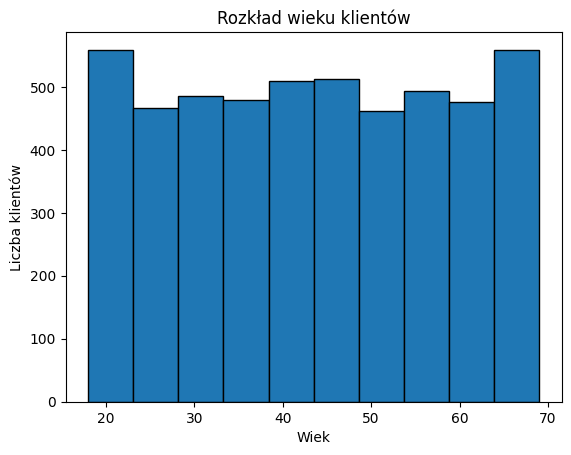

In [15]:


plt.hist(customers['age'], bins=10, edgecolor='black')
plt.xlabel('Wiek')
plt.ylabel('Liczba klientów')
plt.title('Rozkład wieku klientów')
plt.show()


<Axes: title={'center': 'Średnia wartość transakcji w miesiącach'}, xlabel='purchase_date'>

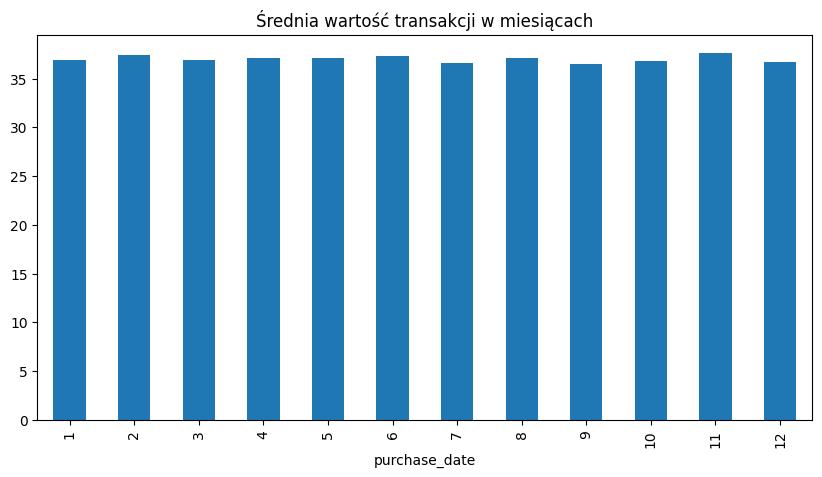

In [16]:
avg_sales_per_month = merged_df.groupby(merged_df['purchase_date'].dt.month)['total_sales'].mean()
avg_sales_per_month.plot(kind='bar', figsize=(10,5), title='Średnia wartość transakcji w miesiącach')


In [17]:
popular_category_by_gender = merged_df.groupby(['gender', 'category'])['transaction_id'].count().reset_index()
popular_category_by_gender = popular_category_by_gender.loc[popular_category_by_gender.groupby('gender')['transaction_id'].idxmax()]
popular_category_by_gender


,gender,category,transaction_id
1,Female,Mrożonki,4411
9,Male,Mrożonki,3584


In [18]:
avg_products_per_transaction = merged_df.groupby('transaction_id')['product_id'].nunique().mean()
avg_products_per_transaction


1.0

In [19]:
customer_loyalty = merged_df.groupby('customer_id').agg({'transaction_id': 'count', 'total_sales': 'sum'})
customer_loyalty.corr()


,transaction_id,total_sales
transaction_id,1.000000,0.801449
total_sales,0.801449,1.000000


In [20]:
sales_per_day = merged_df.groupby(merged_df['purchase_date'].dt.day_name())['total_sales'].sum().sort_values(ascending=False)
sales_per_day


purchase_date
Friday       269793.49
Monday       268761.84
Saturday     267229.77
Wednesday    263005.51
Thursday     262216.10
Sunday       259961.15
Tuesday      259572.02
Name: total_sales, dtype: float64

In [21]:
sales_pivot = merged_df.pivot_table(index='city', columns='category', values='total_sales', aggfunc='sum')
sales_pivot


category,Alkohol,Mrożonki,Nabiał,Napoje,Pieczywo,Produkty świeże,Przekąski,Słodycze
city,,,,,,,,
Gdańsk,42988.74,45158.30,39057.35,29372.46,31232.98,37014.36,35009.46,24362.93
Kraków,53273.13,57136.94,52706.97,43531.18,39733.07,46509.37,42814.44,30925.46
Poznań,46243.13,44987.22,40755.74,31067.89,31172.17,34973.37,35924.04,23434.15
Warszawa,86346.05,87871.31,73262.29,62052.45,62950.03,67748.22,70104.61,44928.36
Wrocław,51456.47,52982.53,49265.35,40009.87,41490.02,45123.35,47397.22,28166.90


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


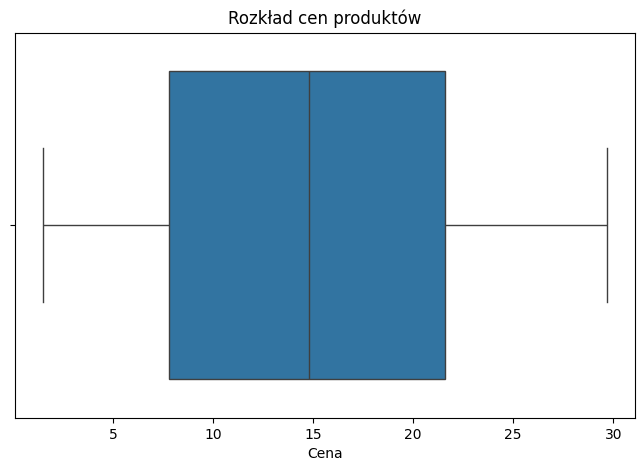

In [22]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x=products['price'])
plt.title('Rozkład cen produktów')
plt.xlabel('Cena')
plt.show()
